In [1]:
import pandas as pd

# Chargement des fichiers CSV
circuits = pd.read_csv('circuits.csv')
constructors = pd.read_csv('constructors.csv')
drivers = pd.read_csv('drivers.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')


In [2]:
# Suppression des doublons
races.drop_duplicates(inplace=True)

# Filtrage des données pour les années >= 2011
races = races[races['year'] >= 2011]

# Traitement des valeurs manquantes
races.fillna({'name': 'Unknown', 'circuitId': 'Unknown'}, inplace=True)


In [3]:
# Suppression des doublons
drivers.drop_duplicates(inplace=True)

# Traitement des valeurs manquantes
drivers.fillna({'forename': 'Unknown', 'surname': 'Unknown'}, inplace=True)


In [4]:
# Suppression des doublons
constructors.drop_duplicates(inplace=True)

# Traitement des valeurs manquantes
constructors.fillna({'name': 'Unknown', 'nationality': 'Unknown'}, inplace=True)


In [5]:
# Suppression des doublons
results.drop_duplicates(inplace=True)

# Filtrage des résultats pour les années >= 2011
# Cela nécessite de joindre temporairement avec 'races' pour obtenir l'année
results = pd.merge(results, races[['raceId', 'year']], on='raceId')
results = results[results['year'] >= 2011]

# Traitement des valeurs manquantes
results.fillna({'positionOrder': 999, 'points': 0}, inplace=True)


In [6]:
# Suppression des doublons
seasons.drop_duplicates(inplace=True)

# Filtrage des données pour les années >= 2011
seasons = seasons[seasons['year'] >= 2011]

# Traitement des valeurs manquantes
seasons.fillna({'url': 'Unknown'}, inplace=True)


In [7]:
# Suppression des doublons
qualifying.drop_duplicates(inplace=True)

# Filtrage des résultats pour les années >= 2011
# Cela nécessite de joindre temporairement avec 'races' pour obtenir l'année
qualifying = pd.merge(qualifying, races[['raceId', 'year']], on='raceId')
qualifying = qualifying[qualifying['year'] >= 2011]

# Traitement des valeurs manquantes
qualifying.fillna({'position': 999}, inplace=True)


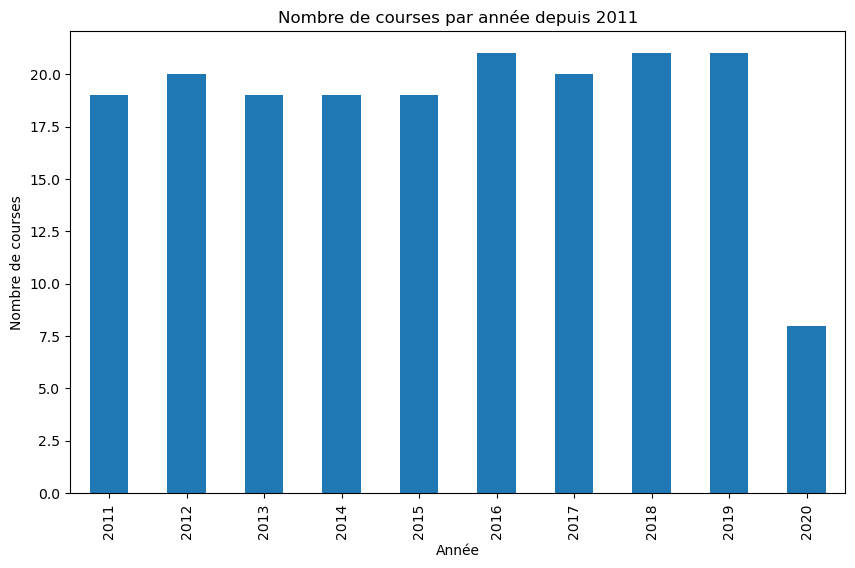

In [8]:
import matplotlib.pyplot as plt

# Calcul du nombre de courses par an
races_per_year = races.groupby('year').size()
# Création du graphique
plt.figure(figsize=(10, 6))
races_per_year.plot(kind='bar')
plt.title('Nombre de courses par année depuis 2011')
plt.xlabel('Année')
plt.ylabel('Nombre de courses')
plt.show()


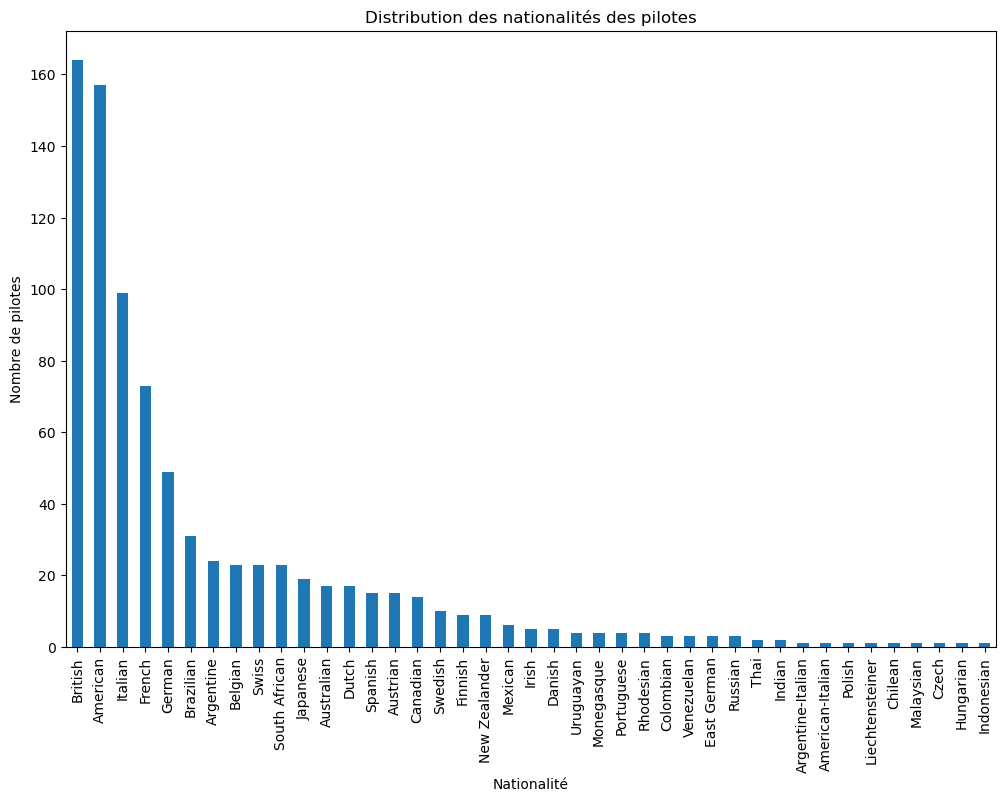

In [9]:
# Calcul de la distribution des nationalités
driver_nationalities = drivers['nationality'].value_counts()
# Création du graphique
plt.figure(figsize=(12, 8))
driver_nationalities.plot(kind='bar')
plt.title('Distribution des nationalités des pilotes')
plt.xlabel('Nationalité')
plt.ylabel('Nombre de pilotes')
plt.show()


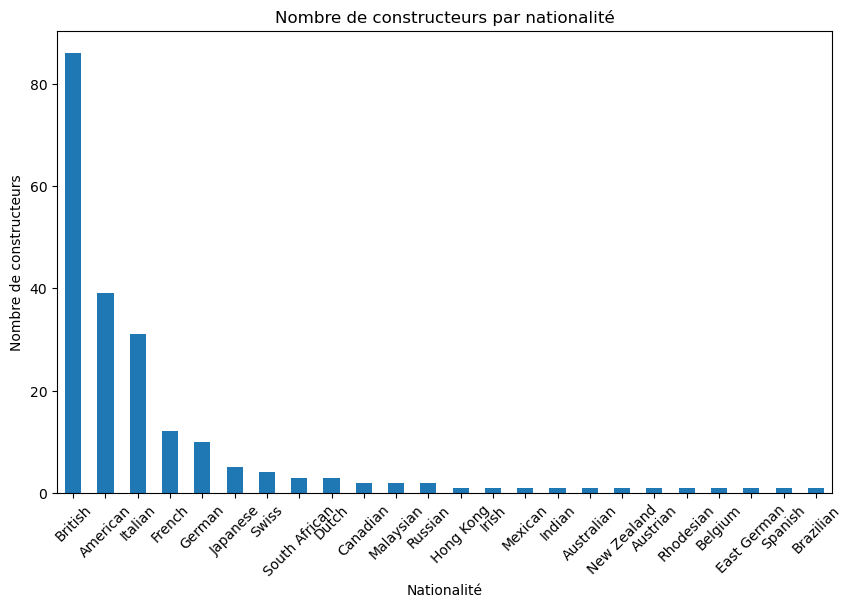

In [10]:
# Calcul du nombre de constructeurs par nationalité
constructors_nationality = constructors['nationality'].value_counts()
# Création du graphique
plt.figure(figsize=(10, 6))
constructors_nationality.plot(kind='bar')
plt.title('Nombre de constructeurs par nationalité')
plt.xlabel('Nationalité')
plt.ylabel('Nombre de constructeurs')
plt.xticks(rotation=45)
plt.show()


In [11]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


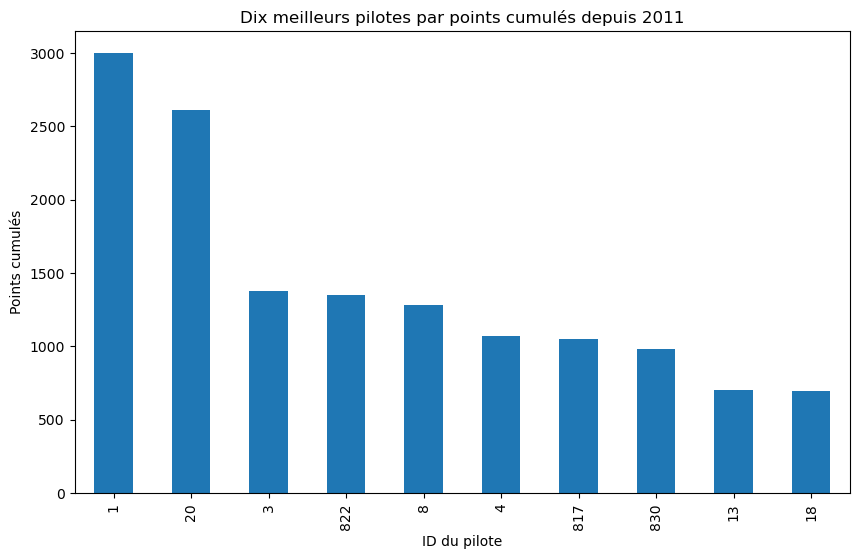

In [12]:
# Aggrégation des points par pilote
points_by_driver = results.groupby('driverId')['points'].sum().sort_values(ascending=False).head(10)
# Création du graphique
plt.figure(figsize=(10, 6))
points_by_driver.plot(kind='bar')
plt.title('Dix meilleurs pilotes par points cumulés depuis 2011')
plt.xlabel('ID du pilote')
plt.ylabel('Points cumulés')
plt.show()


In [13]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,year
0,4537,841,20,9,1,1,1:25.296,1:24.090,1:23.529,2011
1,4538,841,1,1,3,2,1:25.384,1:24.595,1:24.307,2011
2,4539,841,17,9,2,3,1:25.900,1:24.658,1:24.395,2011
3,4540,841,18,1,4,4,1:25.886,1:24.957,1:24.779,2011
4,4541,841,4,6,5,5,1:25.707,1:25.242,1:24.974,2011


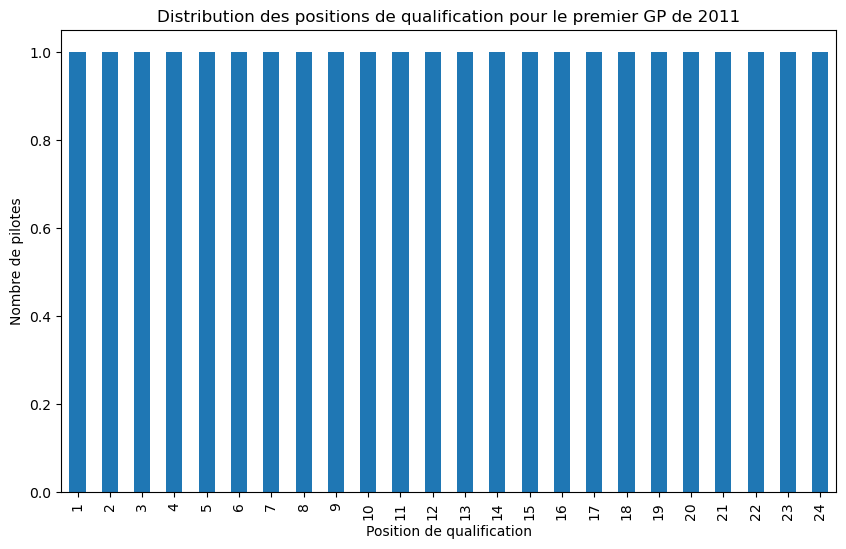

In [14]:
# Sélection des données de qualification pour une course spécifique
specific_qualifying = qualifying[(qualifying['year'] ==2011) & (qualifying['raceId'] == qualifying['raceId'].min())]
# Création du graphique
plt.figure(figsize=(10, 6))
specific_qualifying['position'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution des positions de qualification pour le premier GP de 2011')
plt.xlabel('Position de qualification')
plt.ylabel('Nombre de pilotes')
plt.show()


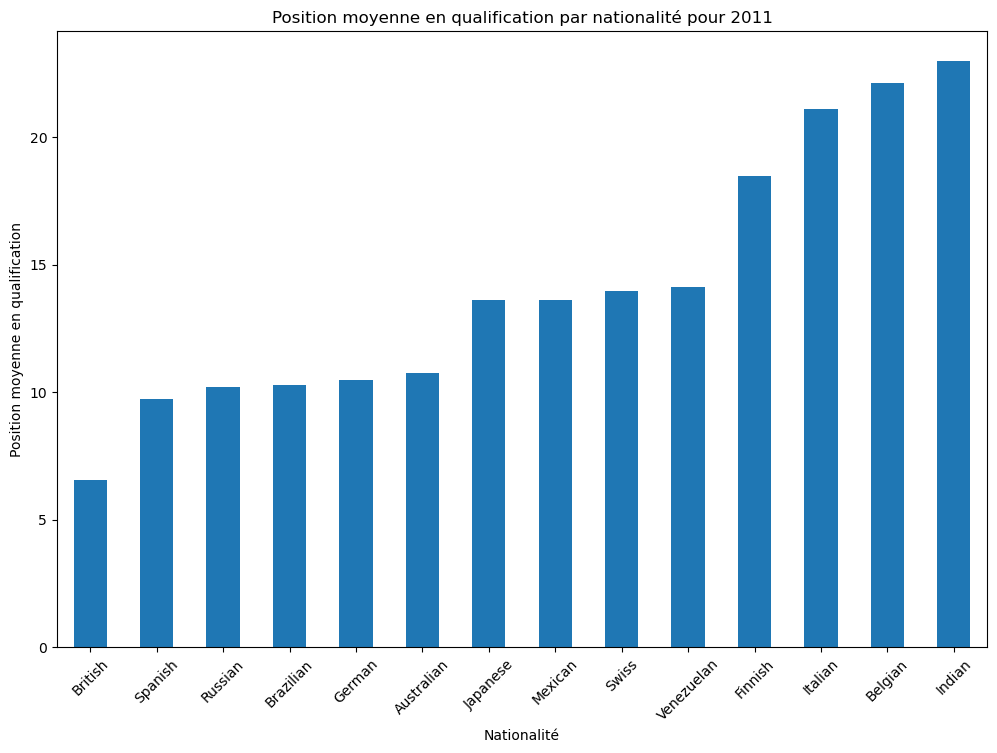

In [15]:
# Fusion des données de drivers et qualifying
drivers_qualifying = pd.merge(qualifying, drivers, on='driverId')

# Filtrage pour l'année 2011
drivers_qualifying_2011 = drivers_qualifying[drivers_qualifying['year'] == 2011]

# Aggrégation des positions moyennes en qualification par nationalité
average_qualifying_by_nationality = drivers_qualifying_2011.groupby('nationality')['position'].mean().sort_values()
# Création du graphique
plt.figure(figsize=(12, 8))
average_qualifying_by_nationality.plot(kind='bar')
plt.title('Position moyenne en qualification par nationalité pour 2011')
plt.xlabel('Nationalité')
plt.ylabel('Position moyenne en qualification')
plt.xticks(rotation=45)
plt.show()


In [16]:
import pandas as pd

# Chargement du fichier de données nettoyées
cleaned_data = pd.read_csv('cleaned_data.csv')

# Affichage des premières lignes pour comprendre la structure des données
print(cleaned_data.head())
print(cleaned_data.columns)  # Afficher les noms des colonnes pour vérifier les données disponibles


   Unnamed: 0                         GP_name  quali_pos constructor  \
0          90  Albert Park Grand Prix Circuit         16    Williams   
1          91  Albert Park Grand Prix Circuit         15    Williams   
2          92  Albert Park Grand Prix Circuit          0    Williams   
3          93  Albert Park Grand Prix Circuit         16    Williams   
4          94  Albert Park Grand Prix Circuit         20    Williams   

            driver  position  driver_confidence  constructor_relaiblity  \
0  Valtteri Bottas      16.0           0.965035                0.569961   
1  Valtteri Bottas      10.0           0.965035                0.569961   
2  Valtteri Bottas       6.0           0.965035                0.569961   
3  Valtteri Bottas      11.0           0.965035                0.569961   
4     Lance Stroll      19.0           0.923077                0.569961   

   active_driver  active_constructor                  dob  istest  
0              1                   1  1989-08-28

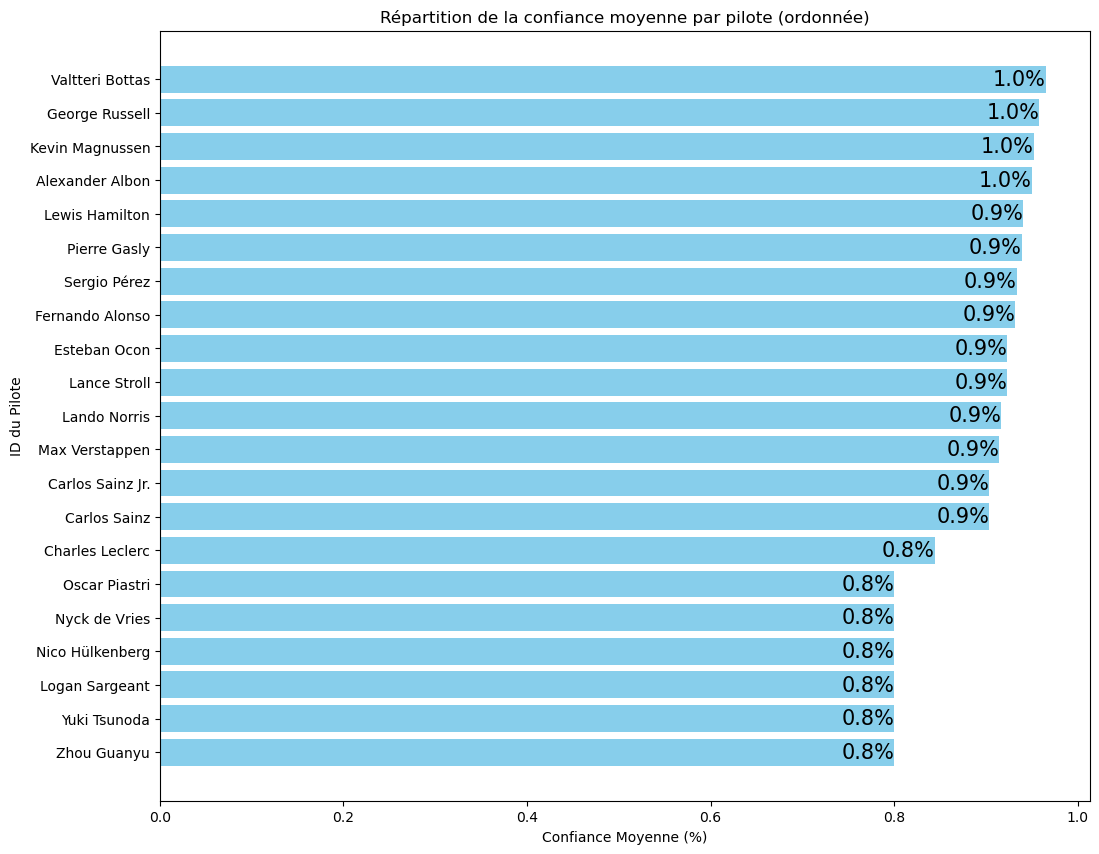

In [17]:
# Calcul de la confiance moyenne pour chaque pilote
driver_confidence = cleaned_data.groupby('driver')['driver_confidence'].mean()

# Tri des données de confiance moyenne par ordre croissant
driver_confidence_sorted = driver_confidence.sort_values()
# Création du diagramme à barres horizontales
plt.figure(figsize=(12, 10))
bars = plt.barh(driver_confidence_sorted.index.map(str), driver_confidence_sorted.values, color='skyblue')

# Ajout des annotations de pourcentage sur chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', 
             va='center', ha='right', color='black', fontsize=15)

plt.title('Répartition de la confiance moyenne par pilote (ordonnée)')
plt.xlabel('Confiance Moyenne (%)')
plt.ylabel('ID du Pilote')
plt.show()



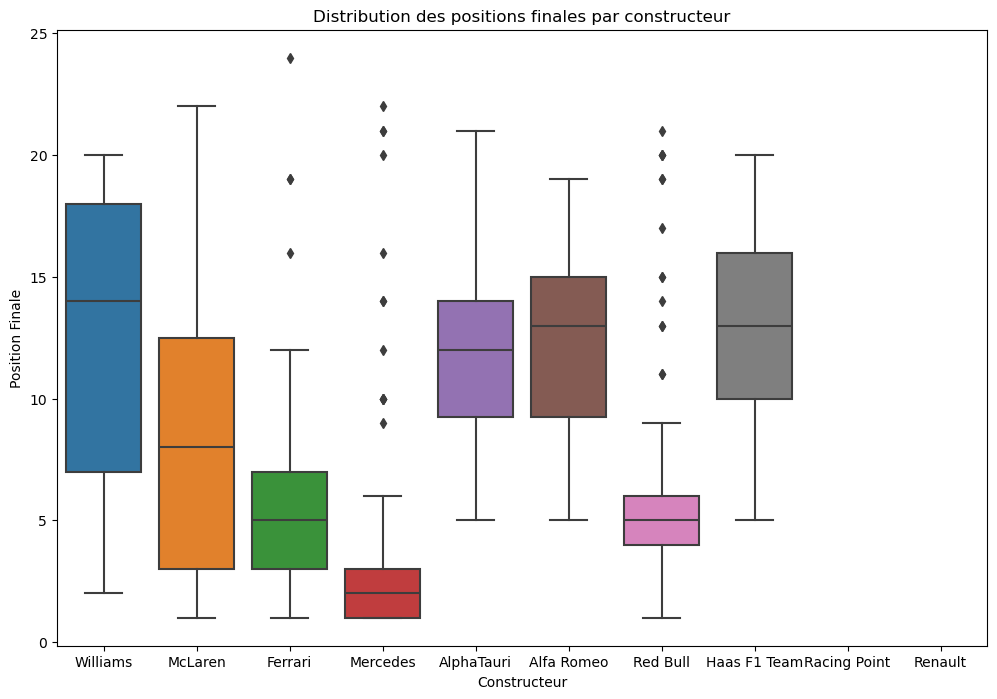

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un diagramme en moustache pour visualiser la distribution des positions
plt.figure(figsize=(12, 8))
sns.boxplot(x='constructor', y='position', data=cleaned_data)
plt.title('Distribution des positions finales par constructeur')
plt.xlabel('Constructeur')
plt.ylabel('Position Finale')
plt.show()


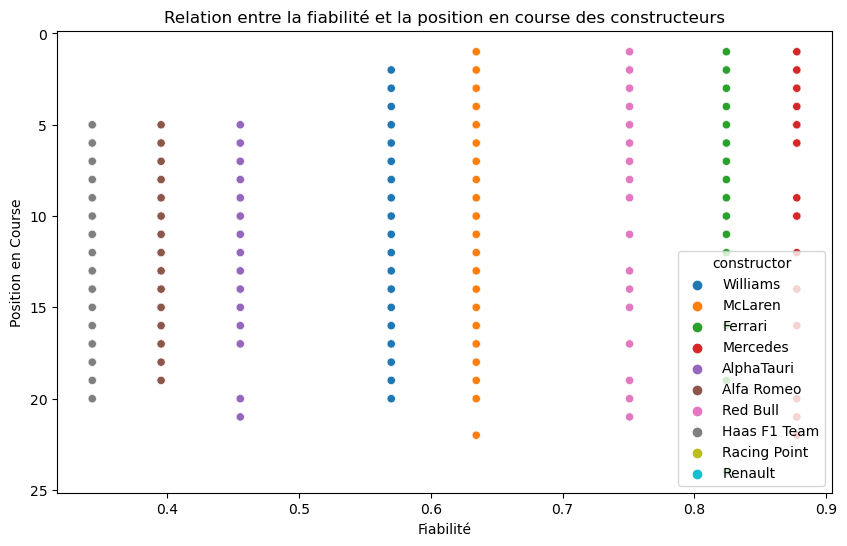

In [19]:
# Création d'un diagramme de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='constructor_relaiblity', y='position', hue='constructor', data=cleaned_data)
plt.title('Relation entre la fiabilité et la position en course des constructeurs')
plt.xlabel('Fiabilité')
plt.ylabel('Position en Course')
plt.gca().invert_yaxis()  # Inverser l'axe Y si nécessaire
plt.show()


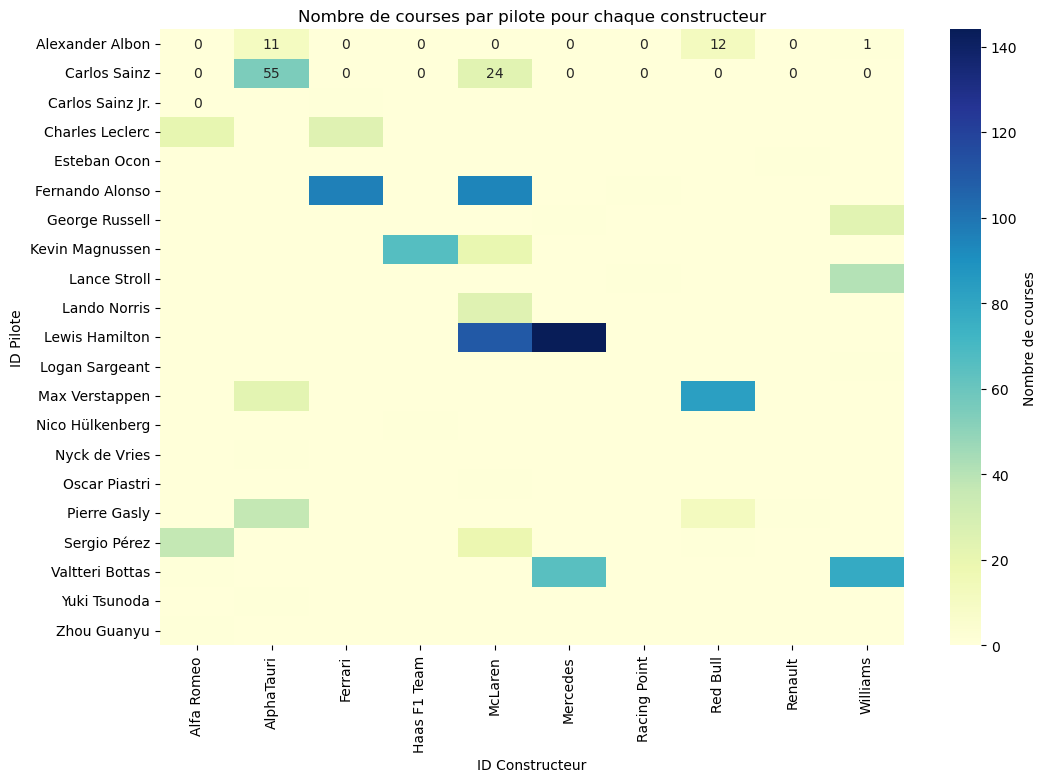

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul du nombre de courses par pilote pour chaque constructeur
driver_constructor_counts = cleaned_data.groupby(['driver', 'constructor']).size().unstack(fill_value=0)

# Création d'un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(driver_constructor_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Nombre de courses'})
plt.title('Nombre de courses par pilote pour chaque constructeur')
plt.xlabel('ID Constructeur')
plt.ylabel('ID Pilote')
plt.show()

